## Report: act_report
## Project overview

<p style="color: #0541a1; font-size:15px;">Wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.WeRateDogs has over 4 million followers and has received international media coverage.</p>

## steps :
>Step 1: Gathering data<br>
>Step 2: Assessing data<br>
>Step 3: Cleaning data<br>
>Step 4: Storing data<br>
>Step 5: Analyzing, and visualizing data<br>
>Step 6: Reporting

## Step 1: Gather
> <span style="color:#0541a1; font-size:20px; font-weight: bold;" >Gather 3 pieces of data:</span>
> <ol style="font-size:19px;">
>    <li>The WeRateDogs Twitter archive<br>
>    <p style="font-size:16px;">read the given file `twitter_archive_enhanced.csv`</p></li><br><br>
>        <li>The tweet image predictions<br>
>   <p style="font-size:16px;"> This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</p><br><br></li>
>    <li>Additional data from the Twitter API<br>
    <p style="font-size:16px;">Gather each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.</p></li>
>  </ol>

In [2]:
import pandas as pd

archive_clean = pd.read_csv('archive_clean.csv')

In [3]:
archive_clean

Unnamed: 0            tweet_id  \
0              0  892420643555336193   
1              1  892177421306343426   
2              2  891815181378084864   
3              3  891689557279858688   
4              4  891327558926688256   
...          ...                 ...   
2066        2351  666049248165822465   
2067        2352  666044226329800704   
2068        2353  666033412701032449   
2069        2354  666029285002620928   
2070        2355  666020888022790149   

                                                   text            timestamp  \
0     This is Phineas. He's a mystical boy. Only eve...  2017-08-01 16:23:56   
1     This is Tilly. She's just checking pup on you....  2017-08-01 00:17:27   
2     This is Archie. He is a rare Norwegian Pouncin...  2017-07-31 00:18:03   
3     This is Darla. She commenced a snooze mid meal...  2017-07-30 15:58:51   
4     This is Franklin. He would like you to stop ca...  2017-07-29 16:00:24   
...                                                 ...                  ...   
2066  Here we have a 1949 1st generation vulpix. Enj...  2015-11-16 00:24:50   
2067  This is a purebred Piers Morgan. Loves to Netf...  2015-11-16 00:04:52   
2068  Here is a very happy pup. Big fan of well-main...  2015-11-15 23:21:54   
2069  This is a western brown Mitsubishi terrier. Up...  2015-11-15 23:05:30   
2070  Here we have a Japanese Irish Setter. Lost eye...  2015-11-15 22:32:08   

      rating_numerator  rating_denominator      name dog_stage  retweet_count  \
0                   13                  10   Phineas      None         8853.0   
1                   13                  10     Tilly      None         6514.0   
2                   12                  10    Archie      None         4328.0   
3                   13                  10     Darla      None         8964.0   
4                   12                  10  Franklin      None         9774.0   
...                ...                 ...       ...       ...            ...   
2066                 5                  10      None      None           41.0   
2067                 6                  10      None      None          147.0   
2068                 9                  10      None      None           47.0   
2069                 7                  10      None      None           48.0   
2070                 8                  10      None      None          532.0   

      favorite_count                                          jpg_url  \
0            39467.0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1            33819.0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2            25461.0  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3            42908.0  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4            41048.0  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
...              ...                                              ...   
2066           111.0  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
2067           311.0  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
2068           128.0  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
2069           132.0  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2070          2535.0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
0                     Orange  0.097049   False               Bagel  0.085851   
1                  Chihuahua  0.323581    True            Pekinese  0.090647   
2                  Chihuahua  0.716012    True            Malamute  0.078253   
3                Paper towel  0.170278   False  Labrador retriever  0.168086   
4                     Basset  0.555712    True    English springer  0.225770   
...                      ...       ...     ...                 ...       ...   
2066      Miniature pinscher  0.560311    True          Rottweiler  0.243682   
2067     Rhodesian ridgeback  0.408143    True             Redbone  0.3606

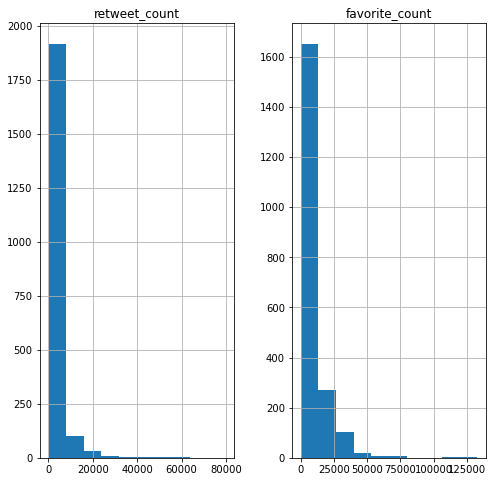

In [8]:
archive_clean[['retweet_count' , 'favorite_count']].hist(figsize=(8,8));

### Top 5 rated dogs 

In [9]:
archive_clean.sort_values(by=['rating_numerator'] , ascending=False).head(5)

Unnamed: 0            tweet_id  \
800          979  749981277374128128   
1793        2074  670842764863651840   
922         1120  731156023742988288   
732          902  758467244762497024   
1510        1779  677716515794329600   

                                                   text            timestamp  \
800   This is Atticus. He's quite simply America af....  2016-07-04 15:00:45   
1793  After so many requests... here you go.\n\nGood...  2015-11-29 05:52:33   
922   Say hello to this unbelievably well behaved sq...  2016-05-13 16:15:54   
732   Why does this never happen at my front door......  2016-07-28 01:00:57   
1510    IT'S PUPPERGEDDON. Total of 144/120 ...I think   2015-12-18 05:06:23   

      rating_numerator  rating_denominator     name dog_stage  retweet_count  \
800               1776                  10  Atticus      None         2772.0   
1793               420                  10     None      None         4324.0   
922                204                  10     this      None         1434.0   
732                165                  10     None      None         2539.0   
1510               144                  10     None      None         1104.0   

      favorite_count                                            jpg_url  \
800           5569.0    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg   
1793          7989.0    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg   
922           4196.0    https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg   
732           5316.0  https://pbs.twimg.com/ext_tw_video_thumb/75846...   
1510          3323.0    https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg   

                      p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
800              Bow tie  0.533941   False  Sunglasses  0.080822   False   
1793          Microphone  0.096063   False   Accordion  0.094075   False   
922             Lakeside  0.501767   False  Breakwater  0.051351   False   
732   Labrador retriever  0.436377    True   Chihuahua  0.113956    True   
1510               Teddy  0.662908   False        Crib  0.031891   False   

                                  p3   p3_conf  p3_dog  
800                         Sunglass  0.050776   False  
1793                       Drumstick  0.061113   False  
922                     King penguin  0.049444   False  
732   American staffordshire terrier  0.099689    True  
1510                            Chow  0.025438    True

### Most popular dog names 

In [10]:
archive_clean['name'].value_counts().head()

None       643
Charlie     11
Tucker      10
Lucy        10
Penny       10
Name: name, dtype: int64

>Most dogs in our data has no names but most used names are Charlie , Tucker , Lucy and Oliver.

### Most Liked tweet 

In [11]:
archive_clean.sort_values(by=['favorite_count'] , ascending=False).head(1)

Unnamed: 0            tweet_id  \
327         413  822872901745569793   

                                                  text            timestamp  \
327  Here's a super supportive puppo participating ...  2017-01-21 18:26:02   

     rating_numerator  rating_denominator  name dog_stage  retweet_count  \
327                13                  10  None     puppo        48265.0   

     favorite_count                                          jpg_url  \
327        132810.0  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   

                   p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
327  Lakeland terrier  0.196015    True  Labrador retriever  0.160329    True   

                p3   p3_conf  p3_dog  
327  Irish terrier  0.069126    True

<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" width="500" height="600">

>This is the most liked dog it has no name but its a puppo and he's a `Lakeland terrier` with %19.6 confidence.